In [1]:
import os
from rich import print
import pandas as pd
import numpy as np

DATASET_ROOT = "../datasets"
DATASET_FILE = DATASET_ROOT + "/preprocessed_dataset.csv"

dataset = pd.read_csv(DATASET_FILE)

In [2]:
dataset.head()

,behavior,image_id,image_file,head_x,head_y,beak_base_x,beak_base_y,beak_tip_x,beak_tip_y,neck_x,neck_y,body1_x,body1_y,body2_x,body2_y,tail_base_x,tail_base_y
0,nesting,n_001,59-20151230231705-00.jpg,19.234443,92.112384,41.246921,134.089668,39.711167,149.447212,61.211727,86.993203,79.640779,136.137341,123.153818,131.530078,176.393301,7.133978
1,nesting,n_001,59-20151230231706-00.jpg,12.579507,49.111263,43.806512,116.684453,55.580628,136.137341,70.426253,83.921694,83.736124,139.208850,145.166297,131.018160,164.619185,5.086305
2,nesting,n_001,59-20151230231714-00.jpg,24.865542,28.634538,38.175412,83.921694,35.615822,99.279237,61.211727,54.742362,86.295715,137.161177,139.535198,132.553914,193.286599,5.086305
3,nesting,n_001,59-20151230231720-00.jpg,23.841705,105.934174,38.175412,120.267882,42.270757,127.946653,49.949529,112.589110,73.497762,132.553916,111.379702,121.291718,126.225327,-0.544792
4,nesting,n_001,59-20151230231721-00.jpg,26.913214,101.838830,37.151576,117.708291,44.318430,125.387062,51.997201,109.005683,66.842826,139.720769,104.212848,131.018162,141.070952,3.550553


In [3]:
# map the behavior column to numeric values
dataset.loc[:, "behavior"] = np.where(dataset["behavior"] == "nesting", 0, 1)

In [4]:
dataset.head()

,behavior,image_id,image_file,head_x,head_y,beak_base_x,beak_base_y,beak_tip_x,beak_tip_y,neck_x,neck_y,body1_x,body1_y,body2_x,body2_y,tail_base_x,tail_base_y
0,0,n_001,59-20151230231705-00.jpg,19.234443,92.112384,41.246921,134.089668,39.711167,149.447212,61.211727,86.993203,79.640779,136.137341,123.153818,131.530078,176.393301,7.133978
1,0,n_001,59-20151230231706-00.jpg,12.579507,49.111263,43.806512,116.684453,55.580628,136.137341,70.426253,83.921694,83.736124,139.208850,145.166297,131.018160,164.619185,5.086305
2,0,n_001,59-20151230231714-00.jpg,24.865542,28.634538,38.175412,83.921694,35.615822,99.279237,61.211727,54.742362,86.295715,137.161177,139.535198,132.553914,193.286599,5.086305
3,0,n_001,59-20151230231720-00.jpg,23.841705,105.934174,38.175412,120.267882,42.270757,127.946653,49.949529,112.589110,73.497762,132.553916,111.379702,121.291718,126.225327,-0.544792
4,0,n_001,59-20151230231721-00.jpg,26.913214,101.838830,37.151576,117.708291,44.318430,125.387062,51.997201,109.005683,66.842826,139.720769,104.212848,131.018162,141.070952,3.550553


In [6]:
dataset.to_csv(DATASET_FILE, index=False)

In [2]:
NUM_BATCH = 16 * 2
batch_size = len(dataset) // NUM_BATCH  # Size of each batch

# Step 1: Split the dataset into batches
batches = [dataset.iloc[i:i + batch_size] for i in range(0, len(dataset), batch_size)]

# Step 2: Shuffle the batches
np.random.seed(42)  # Set seed for reproducibility
np.random.shuffle(batches)

# Step 3: Combine shuffled batches back into a DataFrame
shuffled_dataset = pd.concat(batches, ignore_index=True)

# Step 4: Split the shuffled dataset into training and testing sets
train_size = int(0.9 * len(shuffled_dataset))  # 90% for training
train_df = shuffled_dataset.iloc[:train_size]  # First 90% for training
test_df = shuffled_dataset.iloc[train_size:]   # Last 10% for testing

# Step 5: Map the behavior column to numeric values
train_df.loc[:, "behavior"] = np.where(train_df["behavior"] == "nesting", 0, 1)
test_df.loc[:, "behavior"] = np.where(test_df["behavior"] == "nesting", 0, 1)


# Step 6: Save the training and testing data to CSV files
train_csv_path = os.path.join(DATASET_ROOT, "train_dataset.csv")
test_csv_path = os.path.join(DATASET_ROOT, "test_dataset.csv")

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print(f"Training data saved to {train_csv_path}")
print(f"Testing data saved to {test_csv_path}")


Training data saved to ../datasets\train_dataset.csv

Testing data saved to ../datasets\test_dataset.csv

In [3]:
train_df["behavior"].unique()

array([1, 0], dtype=object)

(320, 240)

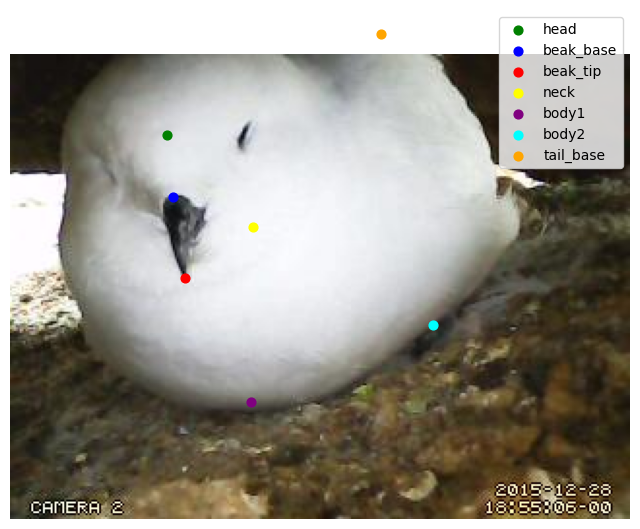

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def plot_keypoints_on_image(behavior, image_id, image_file, keypoints):
    """
    Plot keypoints on an image.

    Args:
        behavior (str): Directory for behavior images.
        image_id (str): ID of the image.
        image_file (str): Image filename.
        keypoints (list): List of tuples containing (x, y) coordinates of keypoints.
    """
    # Construct the image path
    image_path = os.path.join(DATASET_ROOT, behavior, image_id, image_file)
    
    # Load the image
    pil_image = Image.open(image_path)
    print(pil_image.size)
    
    # Plot the image
    plt.figure(figsize=(8, 8))
    plt.imshow(pil_image)
    plt.axis('off')  # Turn off axis

    # Define colors and labels for each keypoint (example)
    keypoint_labels = ['head', 'beak_base', 'beak_tip', 'neck', 'body1', 'body2', 'tail_base']
    keypoint_colors = ['green', 'blue', 'red', 'yellow', 'purple', 'cyan', 'orange']

    # Plot keypoints
    for idx, (x, y) in enumerate(keypoints):
        plt.scatter(x, y, c=keypoint_colors[idx], label=keypoint_labels[idx], s=40, marker='o')

    # Add legend
    plt.legend()

    # Display the plot

# Example data for the keypoints from the new row
keypoints = [
    (80.66461536, 41.43249301),  # head
    (83.736124, 73.17141563),    # beak_base
    (89.87914128, 115.1487004),  # beak_tip
    (124.6895725, 89.04087694),  # neck
    (123.6657363, 179.1384638),  # body1
    (217.858668, 139.2088514),   # body2
    (191.2389264, -10.78315389)  # tail_base
]

# Example usage
behavior = "nesting"  # Replace with actual path
image_id = "n_012"
image_file = "24-20151228185506-00.jpg"

plot_keypoints_on_image(behavior, image_id, image_file, keypoints)